In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
from IPython.core.display import display, HTML

In [37]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')
white_two_classes = np.array([0 if num <6 else 1 for num in white_labels])
red_two_classes = np.array([0 if num <6 else 1 for num in red_labels])

In [8]:
def three_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score <= 6:
            transformed.append("medium")
        else:
            transformed.append("good")
    return np.array(transformed)
def four_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score == 5:
            transformed.append("medium low")
        elif score == 6:
            transformed.append("medium high")
        else:
            transformed.append("good")
    return np.array(transformed)

In [9]:
white_three_classes = three_classes(white_labels)
red_three_classes = three_classes(red_labels)
white_four_classes = four_classes(white_labels)
red_four_classes = four_classes(red_labels)

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # for reporting
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV #BONUS

In [29]:
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

In [46]:
def tune(params, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    gs = GridSearchCV(clf, param_grid=params, cv=5)
    gs.fit(x_train, y_train)
    return gs.best_params_

In [176]:
params = {'max_features': [None, 'auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']}
display(HTML('<h3>Decision Tree\'s results of tuning</h3>'))
print("best for white (2 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_two_classes))
print("best for white (3 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_three_classes))
print("best for white (4 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_four_classes))
print("\n")
print("best for red (2 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_two_classes))
print("best for red (3 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_three_classes))
print("best for red (4 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_four_classes))

best for white (2 classes) {'criterion': 'entropy', 'max_features': 'log2'}
best for white (3 classes) {'criterion': 'entropy', 'max_features': None}
best for white (4 classes) {'criterion': 'gini', 'max_features': None}


best for red (2 classes) {'criterion': 'entropy', 'max_features': 'sqrt'}
best for red (3 classes) {'criterion': 'gini', 'max_features': 'auto'}
best for red (4 classes) {'criterion': 'gini', 'max_features': None}


In [49]:
rfc_params = {'max_features': [None, 'auto', 'sqrt', 'log2'], 'criterion': ['entropy', 'gini']}
print("tune(rfc_params, RandomForestClassifier(), white_instances, white_two_classes)

In [175]:
display(HTML('<h3>Random Forest\'s results of tuning</h3>'))
print("best for white (2 classes)", tune(params, RandomForestClassifier(), white_instances, white_two_classes))
print("best for white (3 classes)", tune(params, RandomForestClassifier(), white_instances, white_three_classes))
print("best for white (4 classes)", tune(params, RandomForestClassifier(), white_instances, white_four_classes))
print("\n")
print("best for red (2 classes)", tune(params, RandomForestClassifier(), red_instances, red_two_classes))
print("best for red (3 classes)", tune(params, RandomForestClassifier(), red_instances, red_three_classes))
print("best for red (4 classes)", tune(params, RandomForestClassifier(), red_instances, red_four_classes))

best for white (2 classes) {'criterion': 'entropy', 'max_features': 'auto'}
best for white (3 classes) {'criterion': 'entropy', 'max_features': 'auto'}
best for white (4 classes) {'criterion': 'gini', 'max_features': 'sqrt'}


best for red (2 classes) {'criterion': 'entropy', 'max_features': 'auto'}
best for red (3 classes) {'criterion': 'gini', 'max_features': 'sqrt'}
best for red (4 classes) {'criterion': 'gini', 'max_features': 'log2'}


In [100]:
def produce_report(clf_name, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    clf = clf
    preds = clf.fit(x_train, y_train).predict(x_test)
    display(HTML('<h4>' + clf_name + "'s accuracy: </h4>"))
    print(accuracy_score(y_test, preds))
    display(HTML('<strong>Report</strong>:\n'))
    print(classification_report(y_test, preds), "\n")
    return y_test, preds


## Decision Tree Results

In [189]:
display(HTML('<h3>For White Wine: </h3>'))
y_test_white_dt, y_score_white_dt = produce_report('DT for white wine (2 classes)', 
                                       DecisionTreeClassifier(max_features='log2', 
                                    criterion='entropy'), white_instances, white_two_classes)
produce_report('DT for white wine (3 classes)', DecisionTreeClassifier(max_features=None, 
                                      criterion='entropy'), white_instances, white_three_classes)
produce_report('DT for white wine (4 classes)', DecisionTreeClassifier(max_features=None, 
                                      criterion='gini'), white_instances, white_four_classes)
display(HTML('<h3>For Red Wine: </h3>'))
y_test_red_dt, y_score_red_dt = produce_report('DT for red wine (2 classes)', 
                                       DecisionTreeClassifier(max_features='sqrt', 
                                      criterion='entropy'), red_instances, red_two_classes)
produce_report('DT for red wine (3 classes)', DecisionTreeClassifier(max_features='auto', 
                                      criterion='gini'), red_instances, red_three_classes)
produce_report('DT for red wine (4 classes)', DecisionTreeClassifier(max_features=None, 
                                      criterion='gini'), red_instances, red_four_classes)


0.78612244898


             precision    recall  f1-score   support

          0       0.64      0.69      0.66       371
          1       0.86      0.83      0.84       854

avg / total       0.79      0.79      0.79      1225
 



0.778775510204


             precision    recall  f1-score   support

        bad       0.31      0.22      0.25        51
       good       0.63      0.62      0.63       290
     medium       0.84      0.86      0.85       884

avg / total       0.77      0.78      0.77      1225
 



0.608979591837


             precision    recall  f1-score   support

        bad       0.32      0.19      0.24        54
       good       0.63      0.64      0.63       275
medium high       0.62      0.64      0.63       527
 medium low       0.60      0.61      0.61       369

avg / total       0.60      0.61      0.61      1225
 



0.7625


             precision    recall  f1-score   support

          0       0.74      0.72      0.73       177
          1       0.78      0.79      0.79       223

avg / total       0.76      0.76      0.76       400
 



0.795


             precision    recall  f1-score   support

        bad       0.12      0.15      0.14        13
       good       0.47      0.51      0.49        55
     medium       0.89      0.87      0.88       332

avg / total       0.81      0.80      0.80       400
 



0.605


             precision    recall  f1-score   support

        bad       0.14      0.17      0.15        12
       good       0.42      0.46      0.44        54
medium high       0.60      0.61      0.61       161
 medium low       0.71      0.68      0.69       173

avg / total       0.61      0.60      0.61       400
 



(array(['medium low', 'medium low', 'medium high', 'medium low',
        'medium high', 'medium low', 'medium low', 'good', 'medium low',
        'medium high', 'medium high', 'medium high', 'medium low',
        'medium low', 'medium low', 'medium high', 'medium high',
        'medium high', 'medium high', 'medium high', 'medium low',
        'medium low', 'good', 'medium high', 'good', 'medium high',
        'medium low', 'medium high', 'medium high', 'medium high',
        'medium low', 'medium low', 'medium low', 'good', 'medium high',
        'medium high', 'medium high', 'medium low', 'medium high',
        'medium low', 'bad', 'medium low', 'medium high', 'medium low',
        'medium low', 'medium high', 'medium low', 'medium low',
        'medium high', 'good', 'good', 'medium high', 'medium low',
        'medium high', 'medium low', 'medium high', 'medium low',
        'medium high', 'medium low', 'medium high', 'medium high',
        'medium low', 'medium high', 'medium high

## Random Forest Results

In [190]:
display(HTML('<h3>For White Wine: </h3>'))
y_test_white_rf, y_score_white_rf = produce_report('RF for white wine (2 classes)', 
                                       RandomForestClassifier(max_features='auto', 
                                      criterion='entropy'), white_instances, white_two_classes)
produce_report('RF for white wine (3 classes)', RandomForestClassifier(max_features='auto', 
                                      criterion='entropy'), white_instances, white_three_classes)
produce_report('RF for white wine (4 classes)', DecisionTreeClassifier(max_features='sqrt', 
                                      criterion='gini'), white_instances, white_four_classes)
display(HTML('<h3>For Red Wine: </h3>'))
y_test_red_rf, y_score_red_rf = produce_report('RF for red wine (2 classes)', 
                                       RandomForestClassifier(max_features='auto', 
                                      criterion='entropy'), red_instances, red_two_classes)
produce_report('RF for red wine (3 classes)', RandomForestClassifier(max_features='sqrt', 
                                      criterion='gini'), red_instances, red_three_classes)
produce_report('RF for red wine (4 classes)', RandomForestClassifier(max_features='log2', 
                                      criterion='gini'), red_instances, red_four_classes)


0.812244897959


             precision    recall  f1-score   support

          0       0.73      0.75      0.74       439
          1       0.86      0.85      0.85       786

avg / total       0.81      0.81      0.81      1225
 



0.804897959184


             precision    recall  f1-score   support

        bad       0.53      0.17      0.26        46
       good       0.65      0.64      0.64       274
     medium       0.85      0.89      0.87       905

avg / total       0.80      0.80      0.80      1225
 



0.602448979592


             precision    recall  f1-score   support

        bad       0.19      0.19      0.19        47
       good       0.56      0.58      0.57       269
medium high       0.64      0.65      0.64       524
 medium low       0.64      0.61      0.63       385

avg / total       0.60      0.60      0.60      1225
 



0.78


             precision    recall  f1-score   support

          0       0.77      0.73      0.75       181
          1       0.79      0.82      0.80       219

avg / total       0.78      0.78      0.78       400
 



0.8575


             precision    recall  f1-score   support

        bad       0.14      0.10      0.12        10
       good       0.55      0.55      0.55        47
     medium       0.91      0.92      0.92       343

avg / total       0.85      0.86      0.85       400
 



0.695


             precision    recall  f1-score   support

        bad       0.14      0.06      0.08        17
       good       0.60      0.62      0.61        47
medium high       0.69      0.72      0.71       166
 medium low       0.75      0.75      0.75       170

avg / total       0.68      0.69      0.69       400
 



(array(['medium high', 'medium high', 'medium high', 'medium low',
        'medium low', 'medium high', 'medium high', 'good', 'medium low',
        'medium high', 'medium low', 'medium high', 'medium high',
        'medium high', 'medium high', 'medium low', 'medium low',
        'medium high', 'medium high', 'medium low', 'medium high', 'good',
        'medium low', 'medium high', 'medium high', 'medium high',
        'medium low', 'medium low', 'medium low', 'medium high',
        'medium low', 'medium high', 'medium low', 'medium high',
        'medium high', 'medium low', 'medium low', 'medium low', 'good',
        'medium low', 'good', 'medium low', 'medium low', 'medium low',
        'medium high', 'medium high', 'medium low', 'medium low',
        'medium high', 'medium high', 'good', 'medium high', 'bad',
        'medium high', 'medium low', 'medium low', 'medium low',
        'medium high', 'medium high', 'medium high', 'medium high',
        'medium low', 'medium low', 'medi

## ROC Curve for Decision Tree

In [191]:
# Compute ROC curve and ROC area for each class
def draw_curve(title, y_test, y_preds):    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

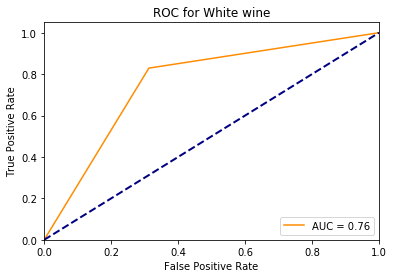

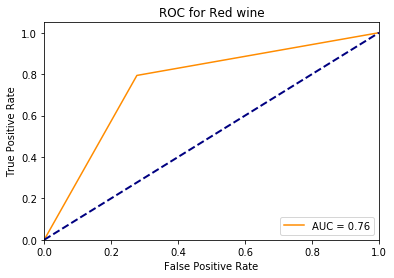

In [192]:
draw_curve('ROC for White wine', y_test_white_dt, y_score_white_dt)
draw_curve('ROC for Red wine', y_test_red_dt, y_score_red_dt)

## ROC Curve for Random Forest

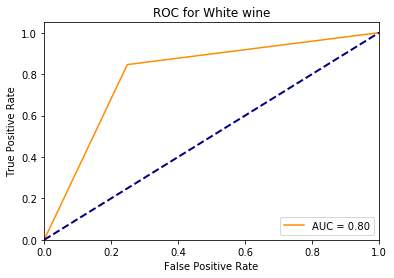

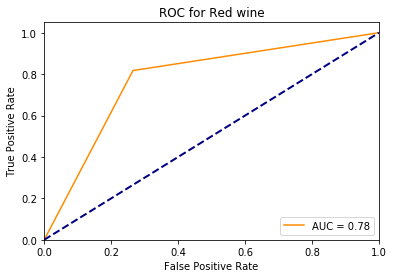

In [193]:
draw_curve("ROC for White wine", y_test_white_rf, y_score_white_rf)
draw_curve("ROC for Red wine", y_test_red_rf, y_score_red_rf)